# Regresión logística

La regresión lineal se utiliza para predecir una variable de salida numérica continua, ajustando una relación lineal entre las variables de entrada. El objetivo de la regresión lineal es encontrar la línea que mejor se ajuste
y que minimize el errore cuadrático medio entre los valores previstos y los reales.

La regresión logística se usa para predecir una variable de salida binaria, generalmente un 0 o un 1. Modela la probabilidad de que la variable de salida tome un valor determinado, dadas las variables de entrada. Lo hace ajustando una función logística (también conocida como función sigmoidea) a las variables de entrada. La función logística asigna cualquier valor de entrada a un valor entre 0 y 1, que se puede interpretar como la probabilidad de que la variable de salida sea 1.

La principal diferencia entre la regresión lineal y la regresión logística es el tipo de variable de salida que predicen. La regresión lineal predice una salida numérica continua, mientras que la regresión logística predice una variable de salida binaria modelando la probabilidad de que la variable de salida tome un valor determinado.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

import seaborn as sns 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error# error
from sklearn import metrics

from sklearn.model_selection import GridSearchCV


## Función sigmoide
 
\begin{align}
\large f(x)=\sigma(x)=\frac{1}{1+e^{(β₀ + β₁x₁ + β₂x₂ +…+ βₐxₐ + ε)}}
\end{align}



La regresión logística transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1.

https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica

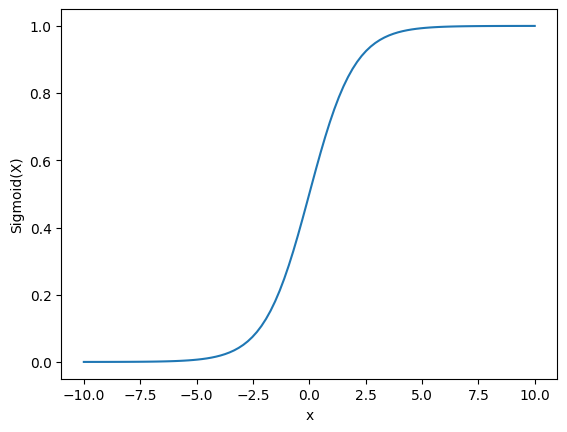

In [2]:
x = np.linspace(start=-10, stop= 10, num=100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.show()

## Regresión logística con base de datos

In [3]:
datos = pd.read_csv('./datasets/salary_data.csv')
datos.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Nueva variable: 

Separa los salarios en alto, cuando es mayor a 100000 USD (IsHighSalary = 1) y bajo cuando no (IsHighSalary = 0) 

In [4]:
datos['IsHighSalary'] = datos['Salary'].apply(lambda x: 1 if x >= 100000 else 0)
datos.sample(10)

,YearsExperience,Salary,IsHighSalary
25,9.0,105582.0,1
14,4.5,61111.0,0
0,1.1,39343.0,0
8,3.2,64445.0,0
28,10.3,122391.0,1
26,9.5,116969.0,1
23,8.2,113812.0,1
29,10.5,121872.0,1
17,5.3,83088.0,0
9,3.7,57189.0,0


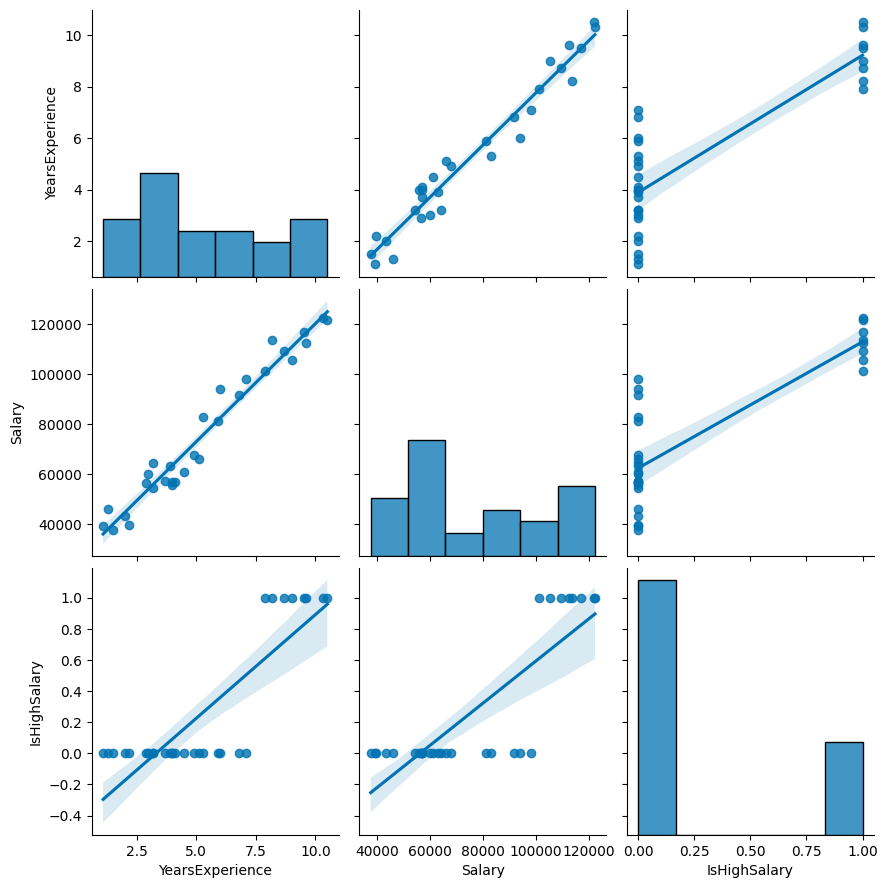

In [5]:
sns.set_palette('colorblind')
sns.pairplot(datos, height=3,kind = 'reg')

## Seleccionar características

In [16]:
features = datos.drop(columns=['Salary', 'IsHighSalary'])
target = datos['IsHighSalary']


# Separa en conjunto de entrenamiento y conjunto de prueba

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)


## Entrenar modelo de regresión logística

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('beta_0:',log_reg.intercept_)
print('beta_1:',log_reg.coef_)

beta_0: [-10.59685627]
beta_1: [[1.36458531]]


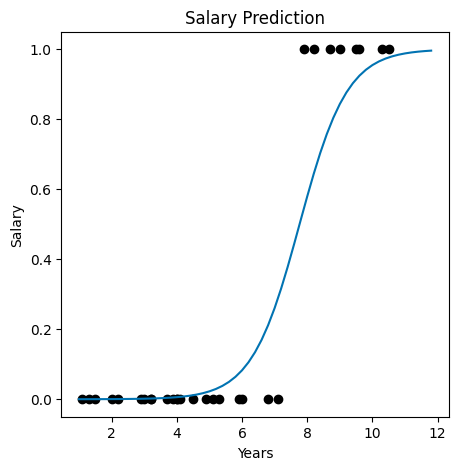

In [9]:
def model(x):
    exponent = log_reg.intercept_[0] + log_reg.coef_[0][0] * x
    return 1 / (1 + math.exp(-exponent))

x = np.arange(1, 12., 0.2)
sig = [model(i) for i in x]

plt.figure(figsize=(5,5))
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.scatter(datos['YearsExperience'], datos['IsHighSalary'], c='black')
plt.plot(x,sig)
plt.show()

## Evaluación del modelo

Error Cuadrático Medio (MSE) = 0.0
Raíz del Error Cuadrático Medio (RMSE) = 0.0
Coeficiente de Determinación R2 = 1.0
Error Absoluto Medio (MAE) = 0.0


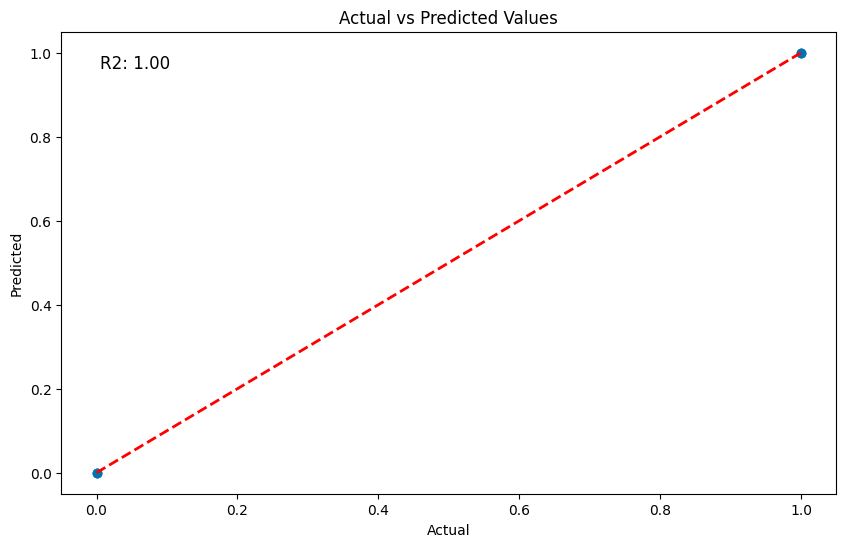

In [23]:
# Error Cuadrado Medio
mse = mean_squared_error(y_test, y_pred)
# La raíz cuadrada del MSE es el RMSE 
rmse = np.sqrt(mse)
# Coeficiente de determinación R2
r2 = r2_score(y_test, y_pred)
# Error absoluto medio
mae = mean_absolute_error(y_test, y_pred)**0.5


print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print('Coeficiente de Determinación R2 = ' + str(r2))
print('Error Absoluto Medio (MAE) = ' + str(mae))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.text(0.05, 0.95, f'R2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()


Text(0.5, 1.0, 'Confusion matrix')

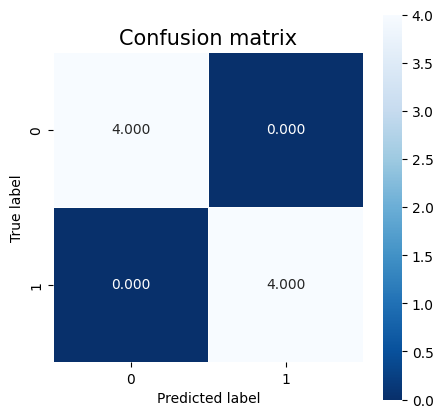

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', size = 15)